# Informe de Data Audit  
**Fecha:** 06/02/2026

Auditoría de calidad de datos para evaluar el estado actual de las fuentes principales del negocio y establecer una base confiable para análisis, reporting y modelado.

## Resumen ejecutivo

La auditoría identificó problemas de calidad en las tablas customers, bookings y payments: duplicados, nulos críticos, formatos inconsistentes y falta de integridad entre tablas. Se generaron métricas, gráficos y una lista priorizada de riesgos. 
El resultado es una visión clara del estado actual y un conjunto de recomendaciones para estabilizar la fuente única de verdad.

## Metodología de auditoría

- Copias para no alterar las fuentes originales  
- Profiling automático: nulos, duplicados, rangos, formatos  
- Validaciones cruzadas entre tablas  
- Muestreo manual para casos atípicos  
- Registro de reglas aplicadas durante la limpieza  

## Métricas de calidad (resumen)

Las siguientes celdas cargan los CSV, calculan métricas y muestran resultados.

In [3]:
import os
import pandas as pd
import numpy as np

os.makedirs("outputs", exist_ok=True)

def safe_load(path):
    try:
        df = pd.read_csv(path)
        print(f"OK: {path} cargado ({len(df):,} registros)")
        return df
    except FileNotFoundError:
        print(f"Archivo no encontrado: {path}")
        return None

customers = safe_load("../data/raw/customers_raw.csv")
bookings = safe_load("../data/raw/bookings_raw.csv")
payments = safe_load("../data/raw/payments_raw.csv")

def quality_metrics(df, name, dup_keys=None):
    if df is None:
        return None
    total = len(df)
    nulls_pct = df.isnull().mean() * 100
    duplicates = df.duplicated(subset=dup_keys).sum() if dup_keys else df.duplicated().sum()
    summary = pd.DataFrame({
        "tabla": [name],
        "registros": [total],
        "duplicados": [duplicates],
        "nulos_promedio_pct": [round(nulls_pct.mean(), 2)]
    })
    return summary, nulls_pct

metrics = []
nulls = {}

for df, name, key in [
    (customers, "customers", ["email"]),
    (bookings, "bookings", ["booking_id"]),
    (payments, "payments", ["payment_id"])
]:
    m = quality_metrics(df, name, key)
    if m:
        metrics.append(m[0])
        nulls[name] = m[1]

if metrics:
    display(pd.concat(metrics, ignore_index=True))

OK: ../data/raw/customers_raw.csv cargado (238 registros)
OK: ../data/raw/bookings_raw.csv cargado (1,225 registros)
OK: ../data/raw/payments_raw.csv cargado (1,390 registros)


,tabla,registros,duplicados,nulos_promedio_pct
0,customers,238,33,25.90
1,bookings,1225,28,31.02
2,payments,1390,46,42.21


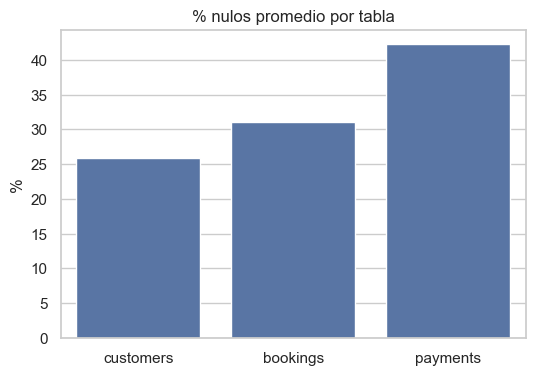

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gráfico 1: % nulos promedio por tabla
avg_nulls = {k: v.mean() for k, v in nulls.items()}
plt.figure(figsize=(6,4))
sns.barplot(x=list(avg_nulls.keys()), y=list(avg_nulls.values()))
plt.title("% nulos promedio por tabla")
plt.ylabel("%")
plt.savefig("outputs/nulls_by_table.png", dpi=150)
plt.show()


# Gráfico 2: duplicados por tabla

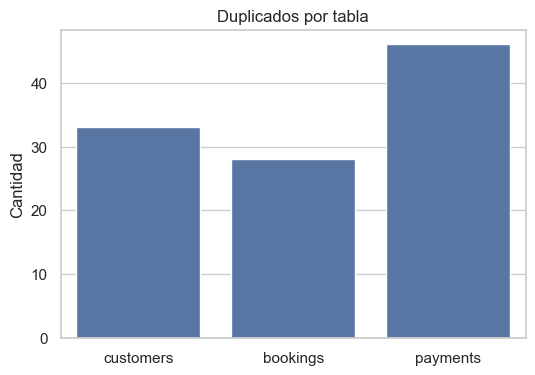

In [9]:
dup_counts = pd.concat(metrics)["duplicados"].values
plt.figure(figsize=(6,4))
sns.barplot(x=["customers","bookings","payments"], y=dup_counts)
plt.title("Duplicados por tabla")
plt.ylabel("Cantidad")
plt.savefig("outputs/duplicates_by_table.png", dpi=150)
plt.show()


Figura: Nulos


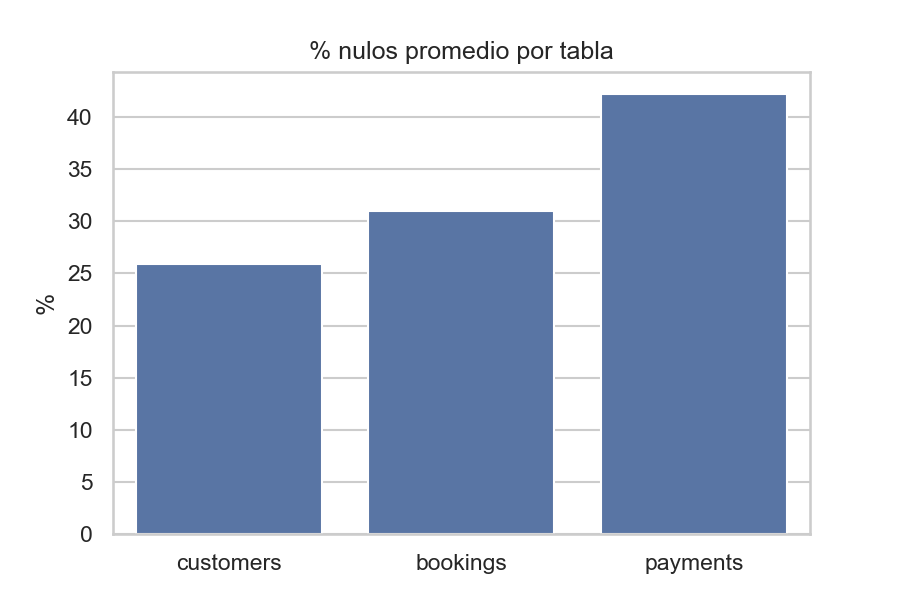

Figura: Duplicados


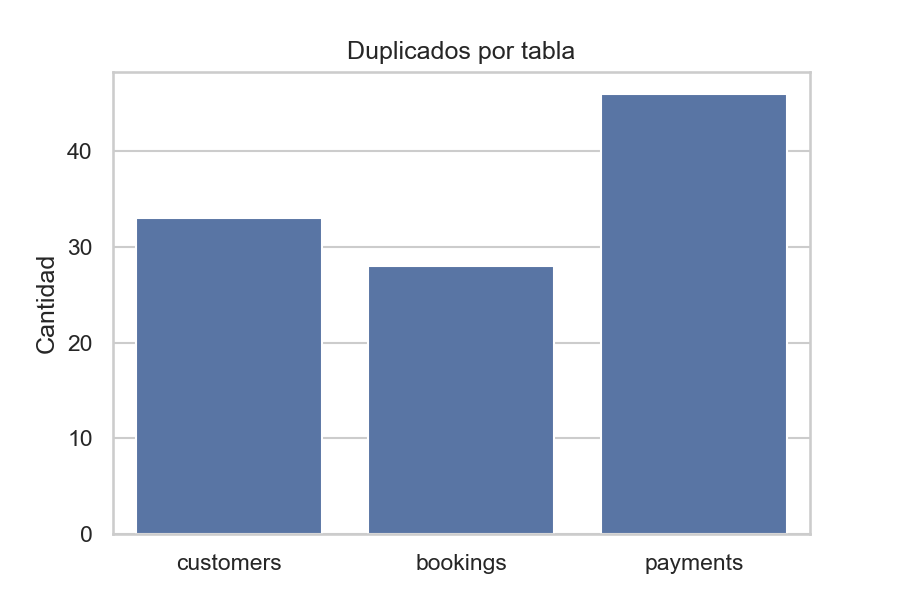

Falta imagen: outputs/revenue_before_after.png — agregar manualmente si corresponde.


In [10]:
from IPython.display import Image, display

for title, path in {
    "Nulos": "outputs/nulls_by_table.png",
    "Duplicados": "outputs/duplicates_by_table.png",
    "Ingresos Antes/Después": "outputs/revenue_before_after.png"
}.items():
    if os.path.exists(path):
        print(f"Figura: {title}")
        display(Image(filename=path))
    else:
        print(f"Falta imagen: {path} — agregar manualmente si corresponde.")


## Problemas detectados

- Fechas no normalizadas  
- Duplicados en customers  
- Pagos sin booking_id  
- Campos obligatorios vacíos  
- Falta de validaciones en origen  

## Riesgos para el negocio

| Riesgo | Probabilidad | Impacto | Prioridad |
|--------|--------------|---------|-----------|
| Métricas financieras erróneas | Alta | Alto | Alta |
| Decisiones operativas equivocadas | Media | Alto | Alta |
| Pérdida de trazabilidad contable | Media | Medio | Media |
| Mala experiencia cliente | Alta | Medio | Media |
| Riesgos regulatorios | Baja | Alto | Media |

## Limitaciones del análisis

- Muestras parciales  
- No se incluyeron logs ni fuentes externas  
- Reglas de negocio asumidas  

## Recomendaciones

### Corto plazo
- Normalizar fechas  
- Deduplicar customers  
- Completar campos obligatorios  

### Medio plazo
- Validaciones en origen  
- Reconciliar pagos sin booking_id  
- Vistas materializadas  

### Largo plazo
- Automatizar ETL  
- Gobernanza de datos  
- Tests de regresión  

## Recomendaciones técnicas mínimas

- Fecha: `TO_TIMESTAMP(...)`  
- Email: regex + validación  
- Duplicados: `LOWER(TRIM(email))`  
- Pagos: matching por importe + ventana de días  

## Entregables asociados

- CSV de métricas  
- Gráficos  
- Script de limpieza  
- Checklist de aceptación  

## Próximos pasos

1. Validación del informe  
2. Ejecución de tareas de corto plazo  
3. Firma del checklist  

## Anexo — Tabla de ejemplo

In [11]:
import pandas as pd

sample = pd.DataFrame({
    "Métrica": ["Registros totales", "% nulos", "Duplicados"],
    "customers": [12345, "12%", 1240],
    "bookings": [45678, "8%", 320],
    "payments": [50123, "3%", 45]
})

sample

,Métrica,customers,bookings,payments
0,Registros totales,12345,45678,50123
1,% nulos,12%,8%,3%
2,Duplicados,1240,320,45
